# **Food Demand Forecasting**

## **Background information:**
There is a meal delivery company that operates in multiple cities. It has various fulfillment centers in these cities for dispatching food orders to their customers. The client needs help with demand forecasting for upcoming weeks for these centers to plan for the raw materials stocking accordingly. The replenishment of the majority of raw materials is done on a weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following dataset, the task is to predict the demand for the next 10 weeks for the center-food combinations in the test set.

## **Dataset source:**
https://www.kaggle.com/datasets/kannanaikkal/food-demand-forecasting

## **Criteria for success:**
Delivering a model with > 90% accuracy to forecast the food demand for next 10 weeks by different meal options across various centers

## **Data Wrangling**

### **1. Loading the dataset**

In [1]:
# Import relevant python libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the given training datset into pandas dataframe
train_df = pd.read_csv('train.csv')
center_info_df = pd.read_csv('fulfilment_center_info.csv')
meal_info_df = pd.read_csv('meal_info.csv')

In [3]:
# Displaying the loaded dataset
print('train_df\n', train_df.head(), '\n\ncenter_info\n', center_info_df.head(), '\n\nmeal_info\n', meal_info_df.head())

train_df
         id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                  0         189  
3                      0                  0          54  
4                      0                  0          40   

center_info
    center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TY

In [4]:
# Merge datasets to review all given information in a single dataframe
revised_train_df = pd.merge(train_df, center_info_df, on='center_id', how='left')
final_train_df = pd.merge(revised_train_df, meal_info_df, on='meal_id', how='left')
final_train_df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  city_code  \
0                      0                  0         177        647   
1                      0                  0         270        647   
2                      0                  0         189        647   
3                      0                  0          54        647   
4                      0                  0          40        647   

   region_code center_type  op_area   category cuisine  
0           56      TYPE_C      2.0  Beverages    Thai  
1           56      TYPE_C      2.0  Beverages    Thai  
2           56      TYPE_C      2.0  Beverages    Thai  
3           56      TYPE_C      2.0  Beverages  Indian  
4           56      TYPE_C      2.0  Beverages  Indian

In [5]:
# Checking column names or features for the training dataset
final_train_df.head(0).T

Empty DataFrame
Columns: []
Index: [id, week, center_id, meal_id, checkout_price, base_price, emailer_for_promotion, homepage_featured, num_orders, city_code, region_code, center_type, op_area, category, cuisine]

### **2. Checking number of rows and columns in the dataset**

In [6]:
# Checking the number of rows and columns of the final_train dataset
final_train_df.shape
print('The given training dataset contains', final_train_df.shape[0], 'rows and', final_train_df.shape[1], 'columns')

The given training dataset contains 456548 rows and 15 columns


### **3. Checking data types and semantics (categorical/numeric) for each column in the dataframe**

In [7]:
# Checking data types and semantics information for each column
final_train_df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [8]:
# Defining a function to check python type for each column in the given dataframe
'''
> Inputs:

  * the_df: a DataFrame

> Returns:

  * A DataFrame with the names of the columns in the_df, and
  the types associated with each column
'''

def get_types_of_df(the_df):

    # get the columns of the_df
    # they will be the columns of the resulting dataframe to be returned by this function
    the_cols = list(the_df)

    # iterate over the set of columns to compute the types of values in the column
    # keep track of them in a dict
    the_types = []
    for the_col in the_cols:
        # compute the set of types for the values in the_col
        # and save a string representation of it in the_types
        the_types += set([type(x) for x in the_df[the_col]])
    # end for

    # create the DataFrame and return it
    return pd.DataFrame({'Column Name': the_cols, 'Column Type': the_types})

# Calling the defined function to check data types for each column
final_train_df_dtypes = get_types_of_df(final_train_df)
print(final_train_df_dtypes)

              Column Name      Column Type
0                      id    <class 'int'>
1                    week    <class 'int'>
2               center_id    <class 'int'>
3                 meal_id    <class 'int'>
4          checkout_price  <class 'float'>
5              base_price  <class 'float'>
6   emailer_for_promotion    <class 'int'>
7       homepage_featured    <class 'int'>
8              num_orders    <class 'int'>
9               city_code    <class 'int'>
10            region_code    <class 'int'>
11            center_type    <class 'str'>
12                op_area  <class 'float'>
13               category    <class 'str'>
14                cuisine    <class 'str'>


In [9]:
# Checking the number of unique values for each column in the training setdataframe
unique_values_per_column = final_train_df.nunique()

print("Number of unique values for each column:")
print(unique_values_per_column)

Number of unique values for each column:
id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64


In [10]:
# Creating data dictionary by adding column semantics information to above dtypes dataframe
final_train_df_dtypes['Column Semantics'] = ['transaction id (numeric)', 'week number (numeric)', 'center number (category)', 'meal type (category)',
                                             'check out price (numeric)', 'base price (numeric)', 'promotion email orders (category)', 'featured order (category)',
                                             'number of orders (numeric)', 'city code (category)', 'region code (category)', 'center type (category)',
                                             'op_area (category)', 'meal type (category)', 'cuisine (category)']
final_train_df_dtypes

Column Name      Column Type                   Column Semantics
0                      id    <class 'int'>           transaction id (numeric)
1                    week    <class 'int'>              week number (numeric)
2               center_id    <class 'int'>           center number (category)
3                 meal_id    <class 'int'>               meal type (category)
4          checkout_price  <class 'float'>          check out price (numeric)
5              base_price  <class 'float'>               base price (numeric)
6   emailer_for_promotion    <class 'int'>  promotion email orders (category)
7       homepage_featured    <class 'int'>          featured order (category)
8              num_orders    <class 'int'>         number of orders (numeric)
9               city_code    <class 'int'>               city code (category)
10            region_code    <class 'int'>             region code (category)
11            center_type    <class 'str'>             center type (category)
12                op_area  <class 'float'>                 op_area (category)
13               category    <class 'str'>               meal type (category)
14                cuisine    <class 'str'>                 cuisine (category)

In [11]:
# Counting the number of categorical and non-categorical columns in the final_train_df_dtypes dataframe
numeric_columns_count = final_train_df_dtypes['Column Semantics'].str.contains('numeric', case=False).sum()
category_columns_count = final_train_df_dtypes['Column Semantics'].str.contains('category', case=False).sum()
print('The given data set contains', numeric_columns_count, 'numeric and', category_columns_count, 'categorical columns.')

The given data set contains 5 numeric and 10 categorical columns.


### **4. Missing values check for different columns in the dataframe**

In [12]:
# Checking number of missing values for each column in the training set dataframe
print('Number of missing values for each column:')
final_train_df.isna().sum().sort_values(ascending=False)

Number of missing values for each column:


id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

There are NO missing values inside the training set dataframe!

### **5. Checking for duplicated rows in the given dataset**

In [13]:
duplicated_rows = final_train_df[final_train_df.duplicated()]

# Print or display the duplicated rows
print("Duplicated Rows:")
print(duplicated_rows)


Duplicated Rows:
Empty DataFrame
Columns: [id, week, center_id, meal_id, checkout_price, base_price, emailer_for_promotion, homepage_featured, num_orders, city_code, region_code, center_type, op_area, category, cuisine]
Index: []


There are NO duplicated rows inside the training set dataframe!

### **6. Data Profiling**

In [14]:
import ydata_profiling

report = final_train_df.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=False
)
report

### Histogram for numerical features: 
1. `id`
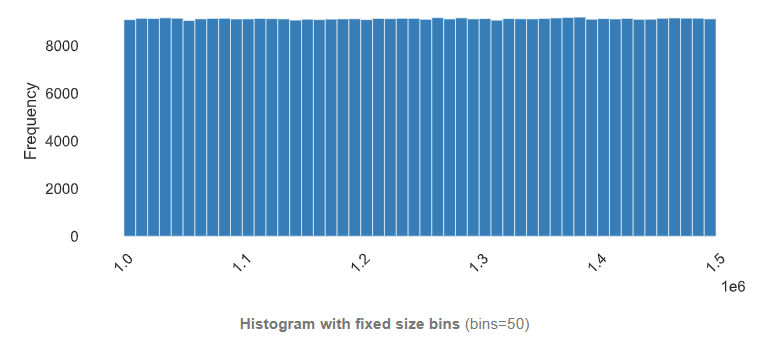

2. `week`
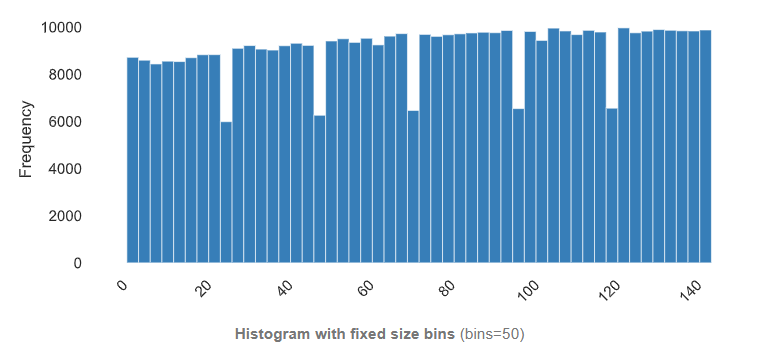

3. `checkout_price`
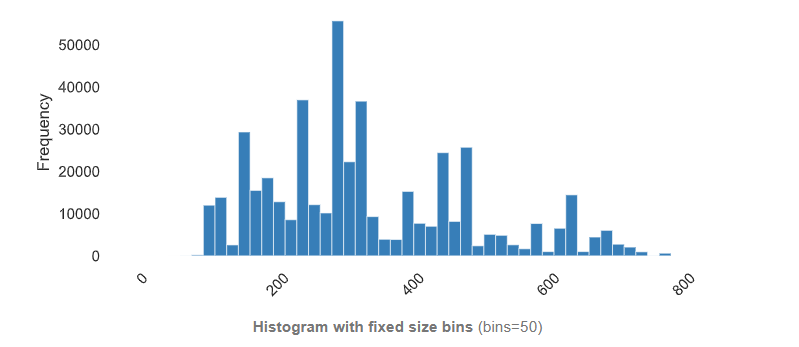

4. `base_price`
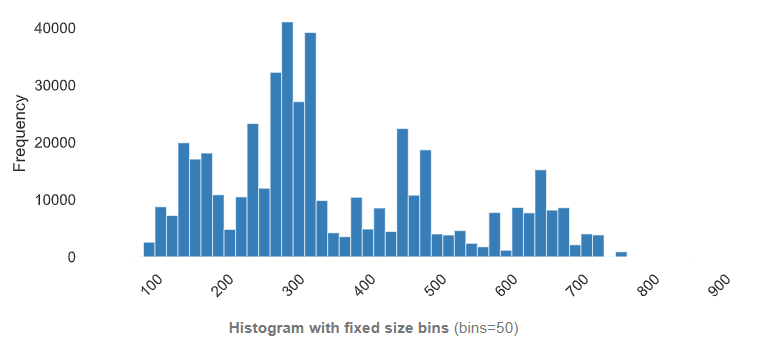

5. `num_orders`
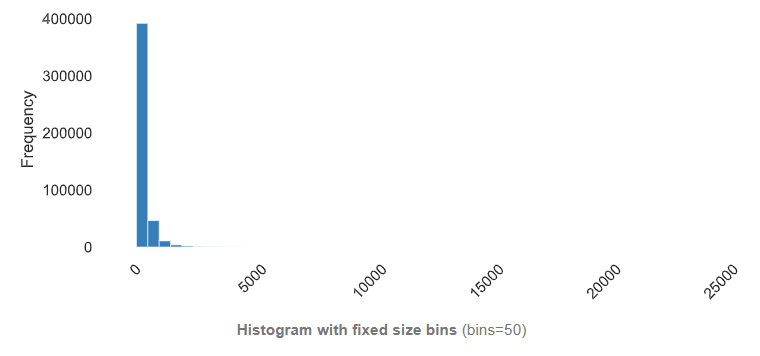


### Bar plots for categorical features:
1. `center_id`
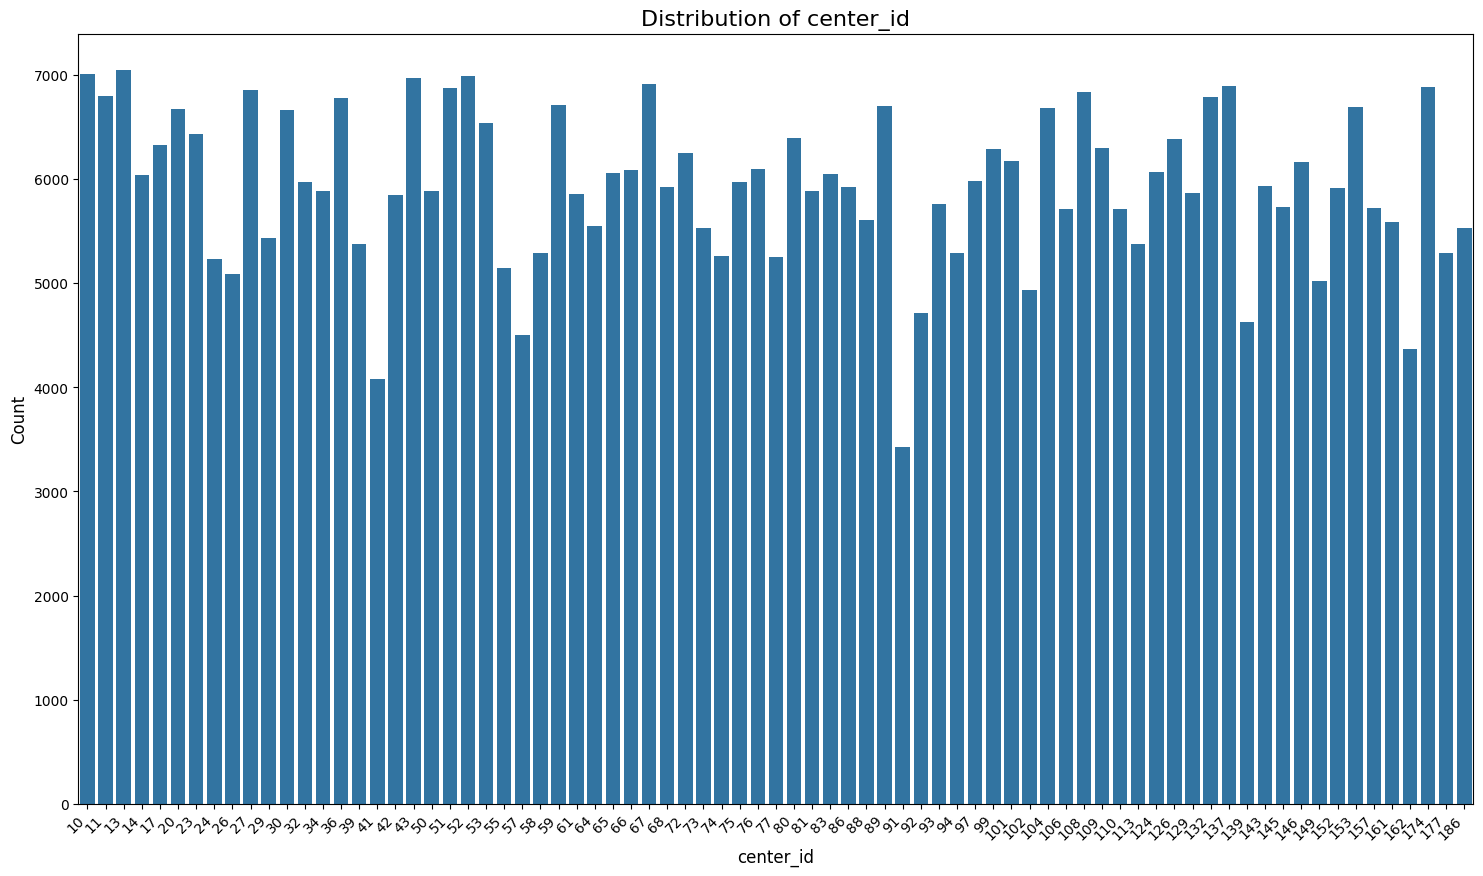

2. `meal_id`
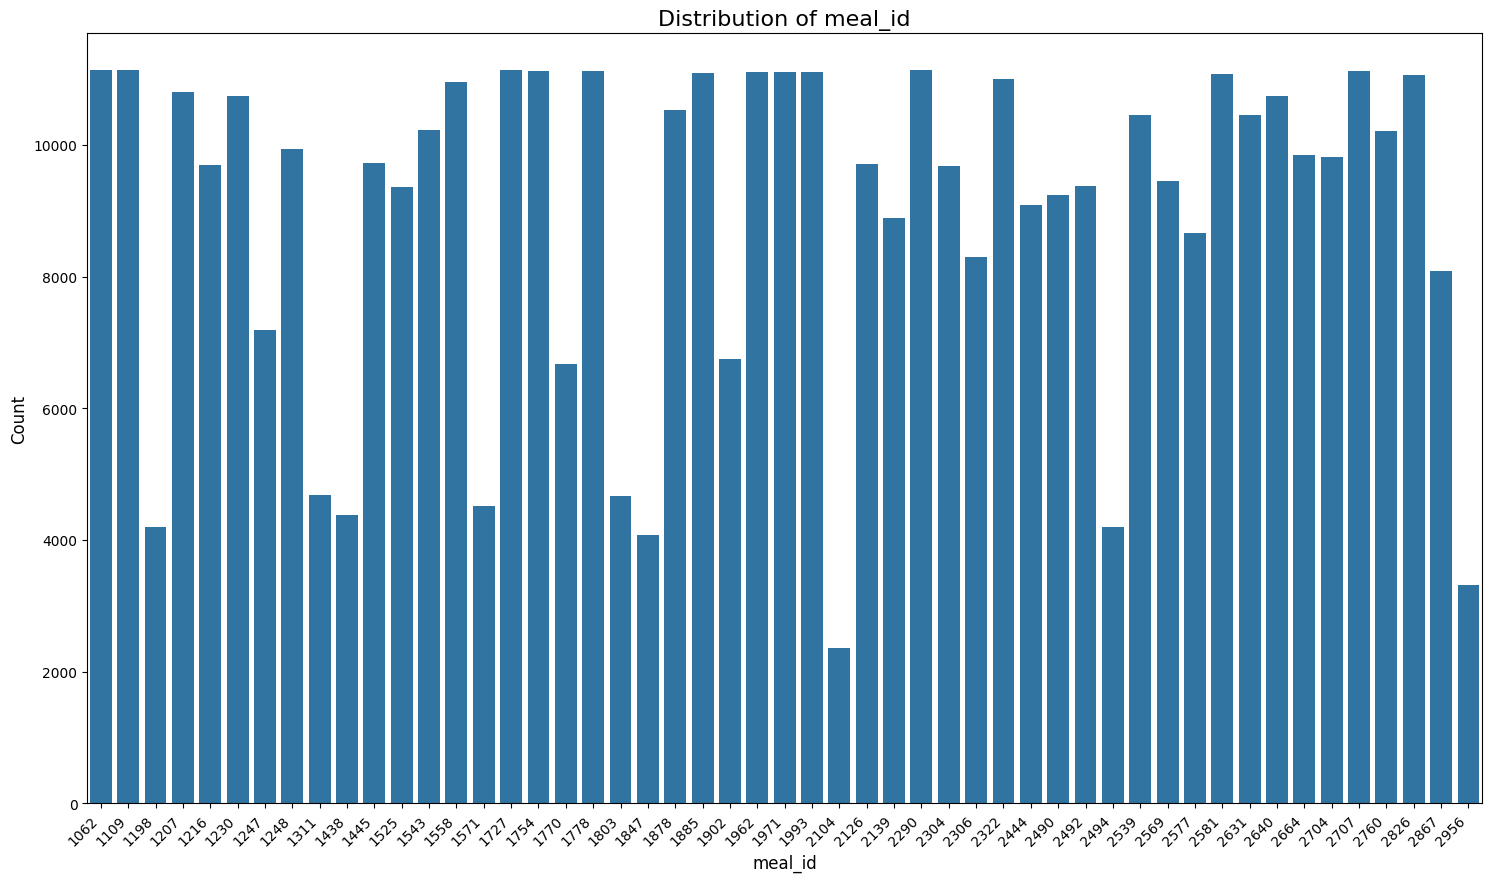

3. `emailer_for_promotion`
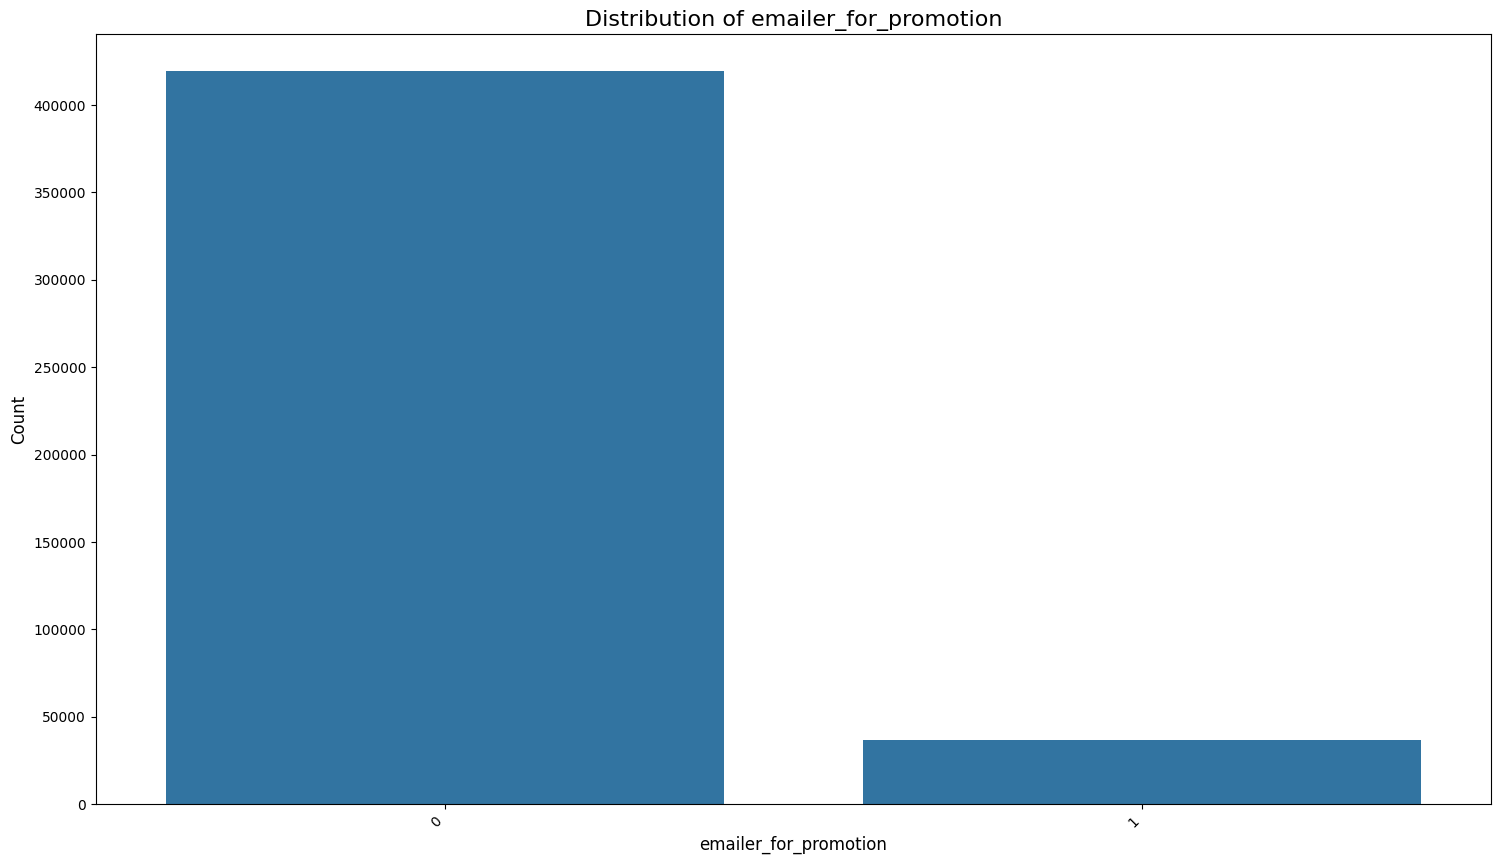

4. `homepage_featured`
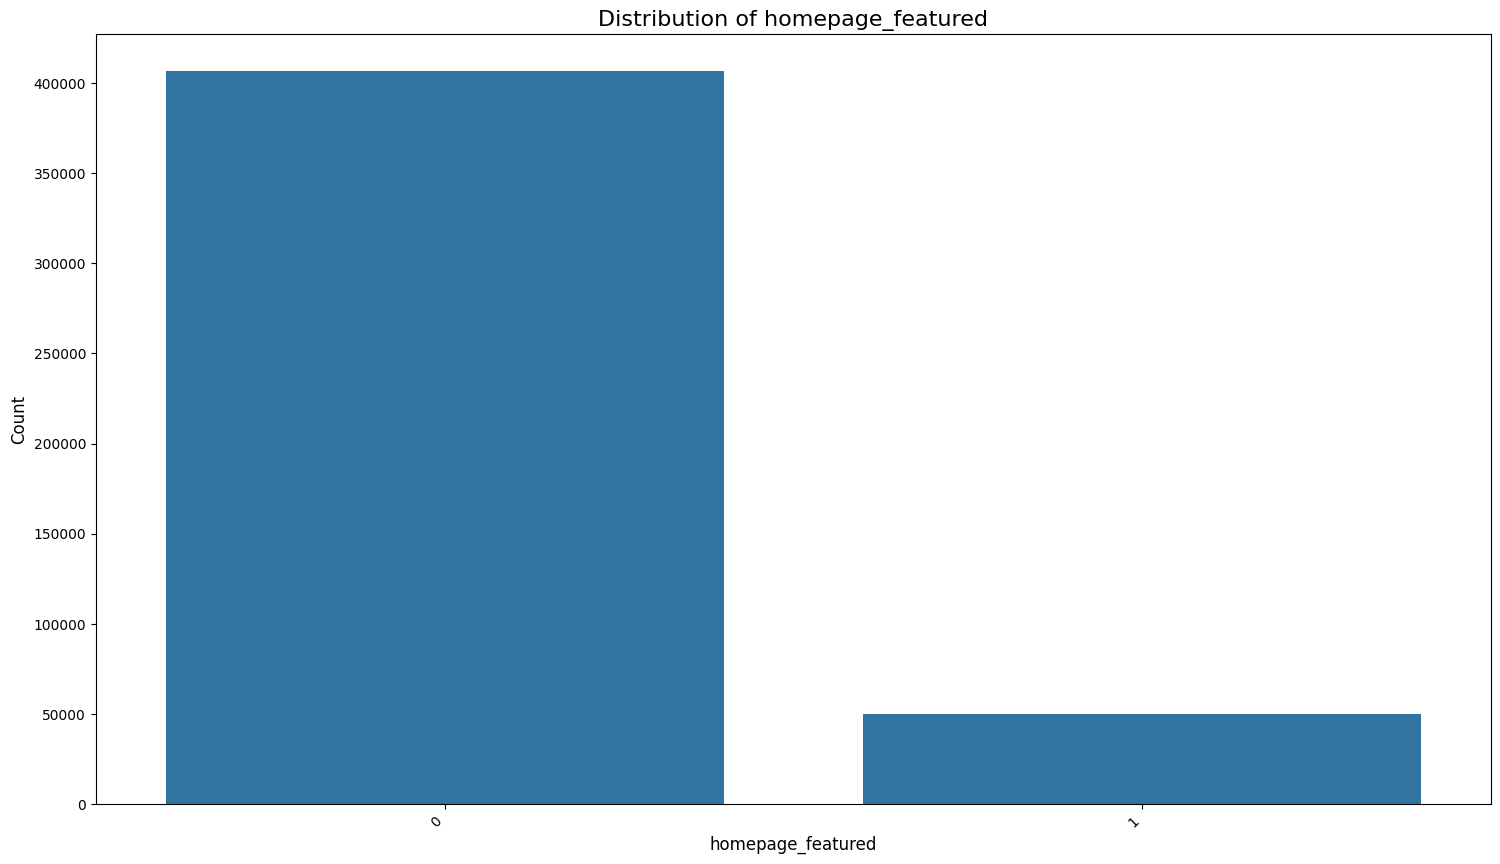

5. `city_code`
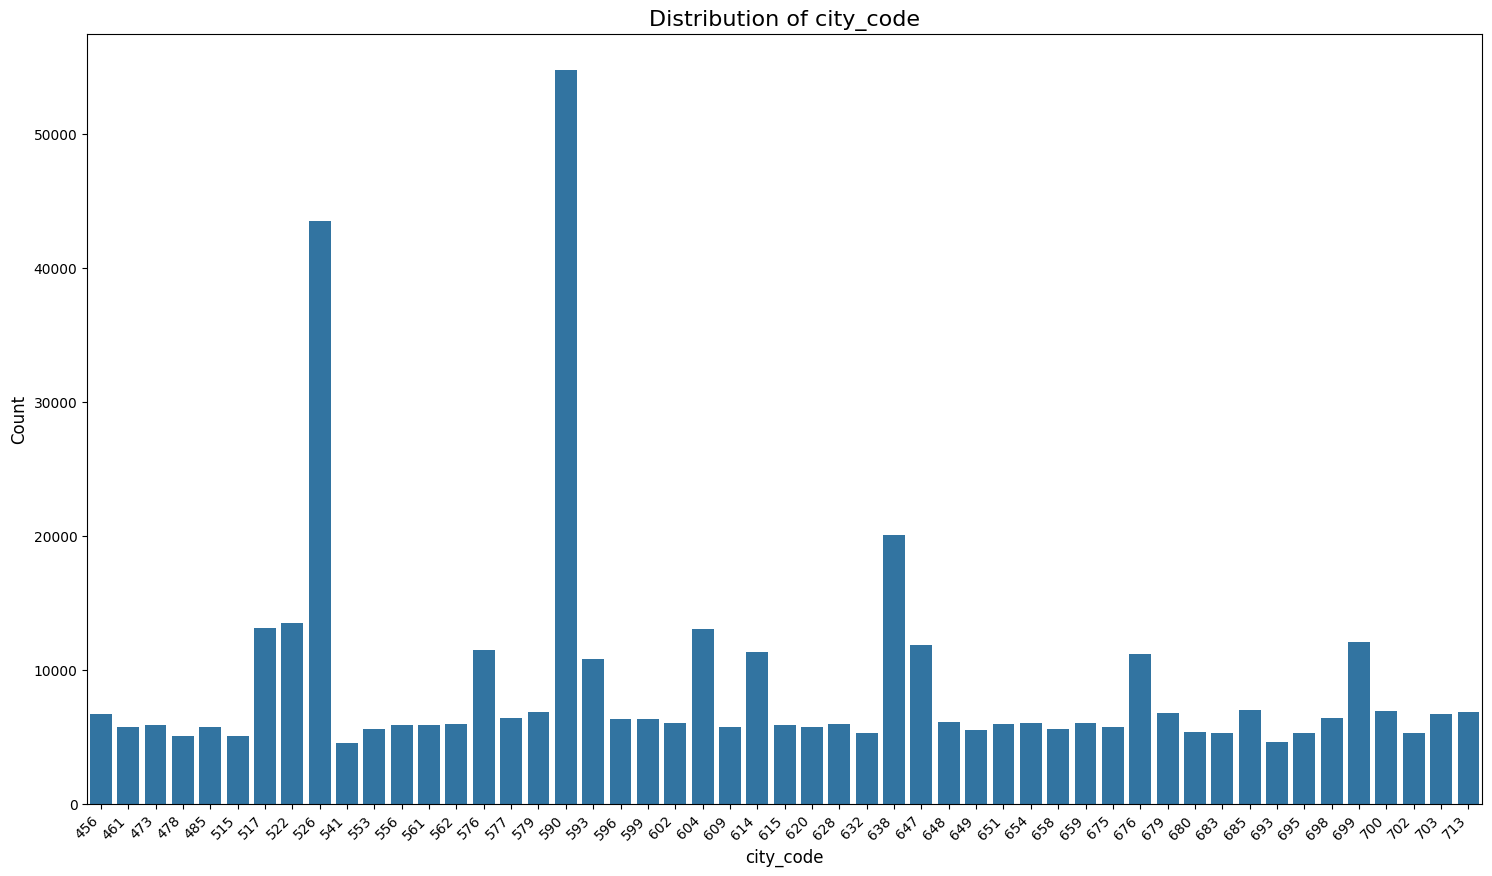

6. `region_code`
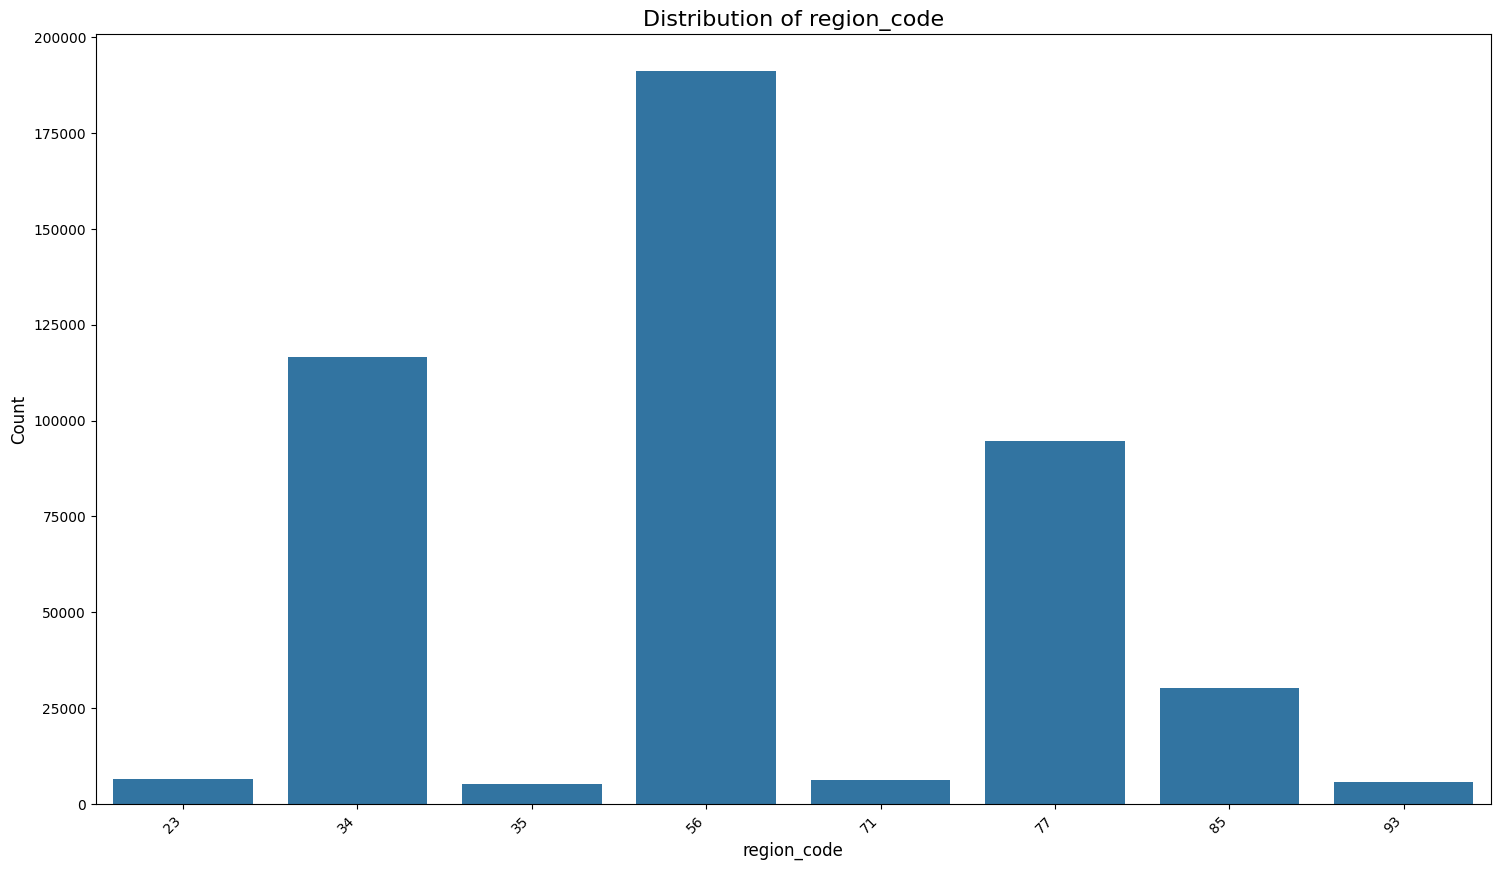

7. `category`
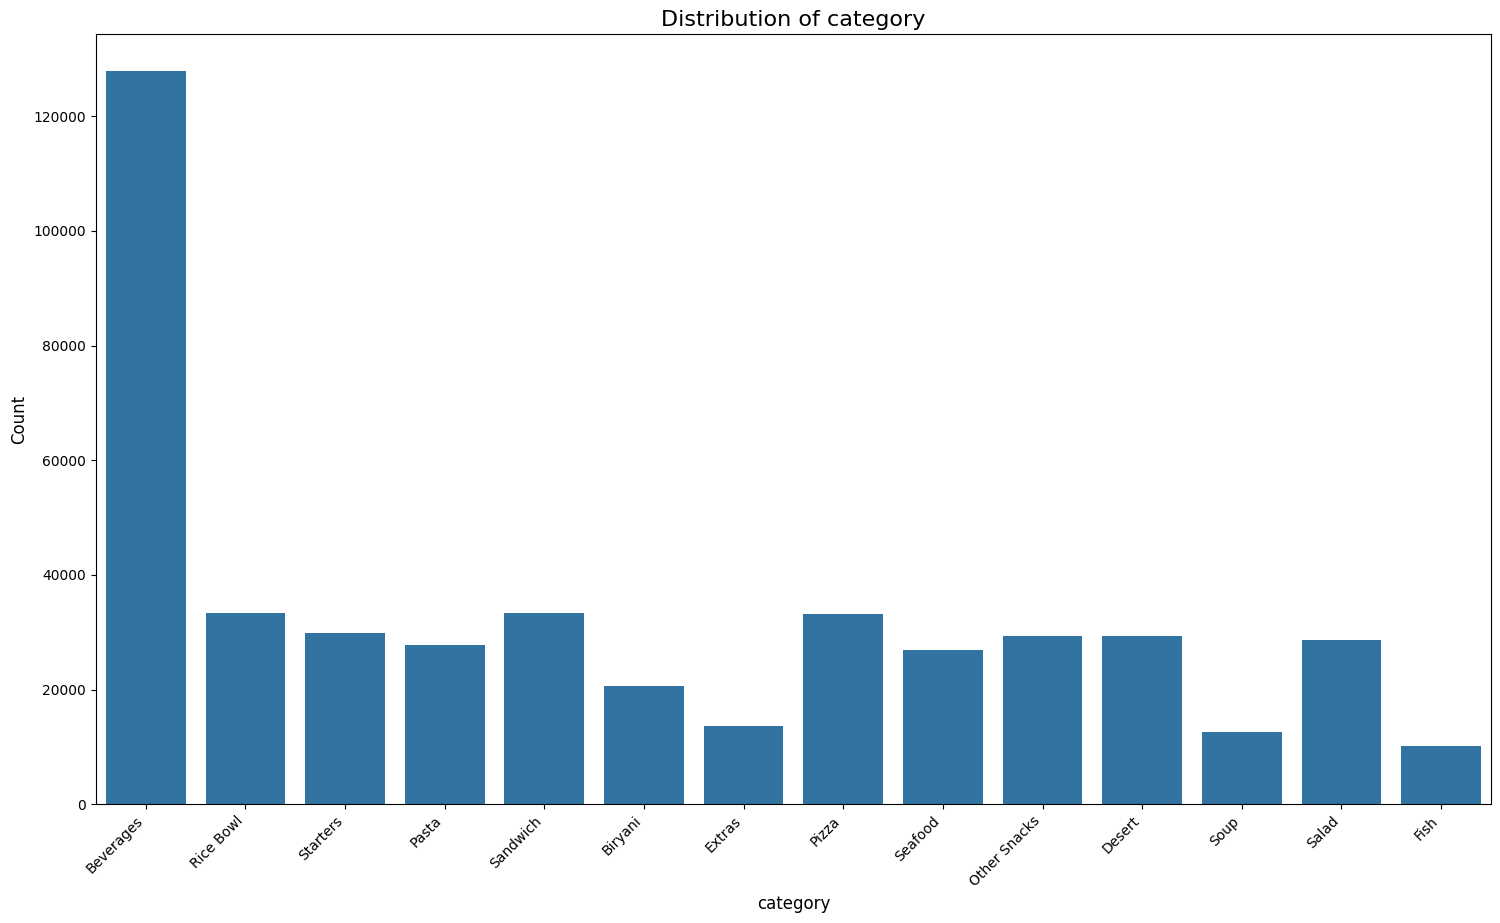

8. `cuisine`
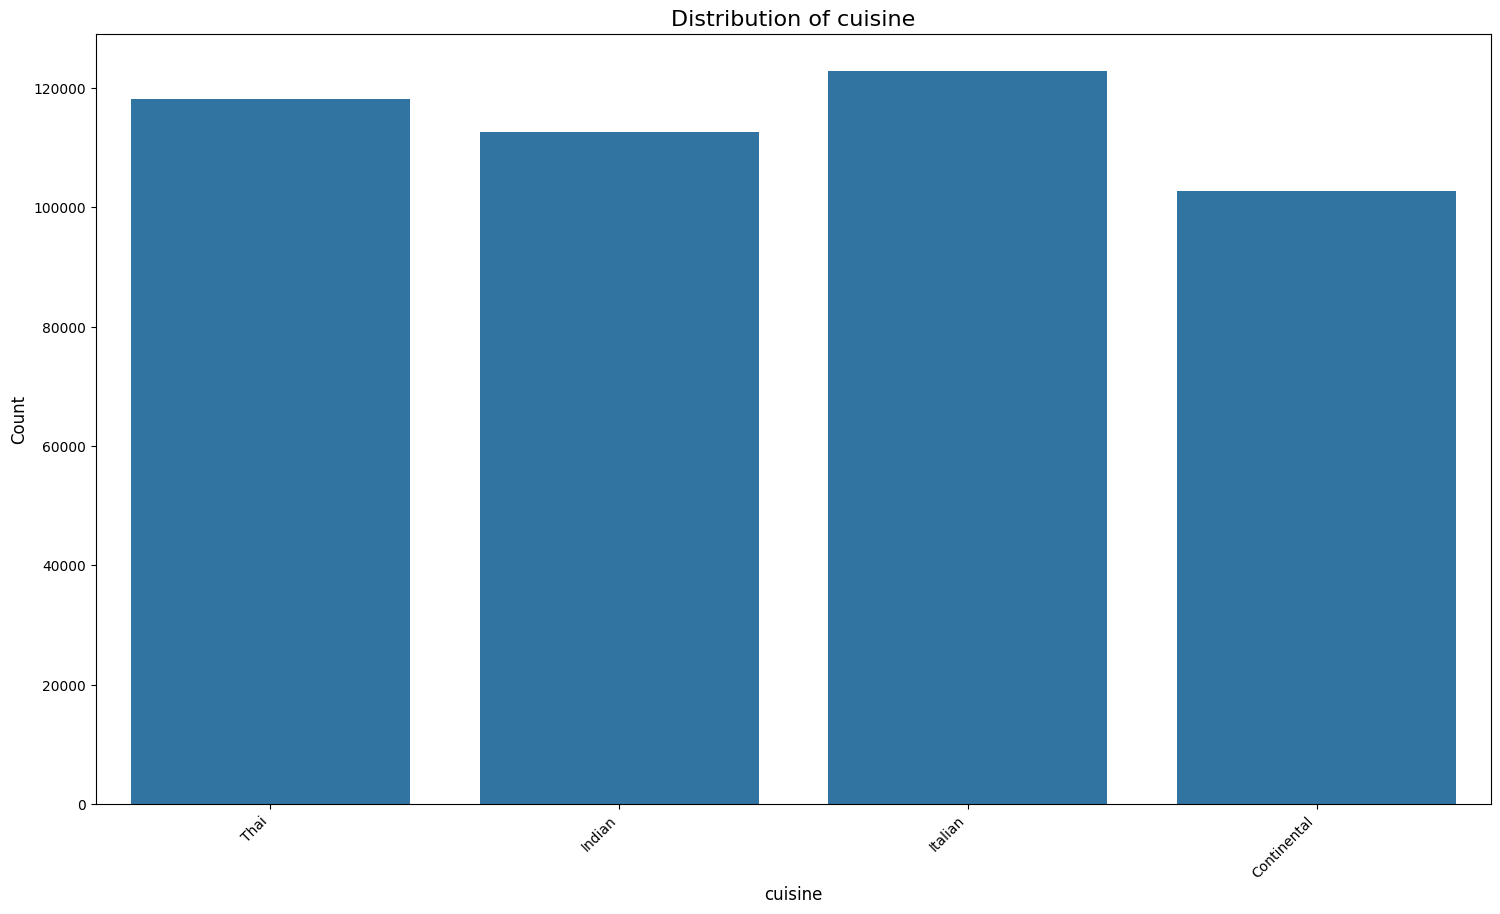

9. `center_type`
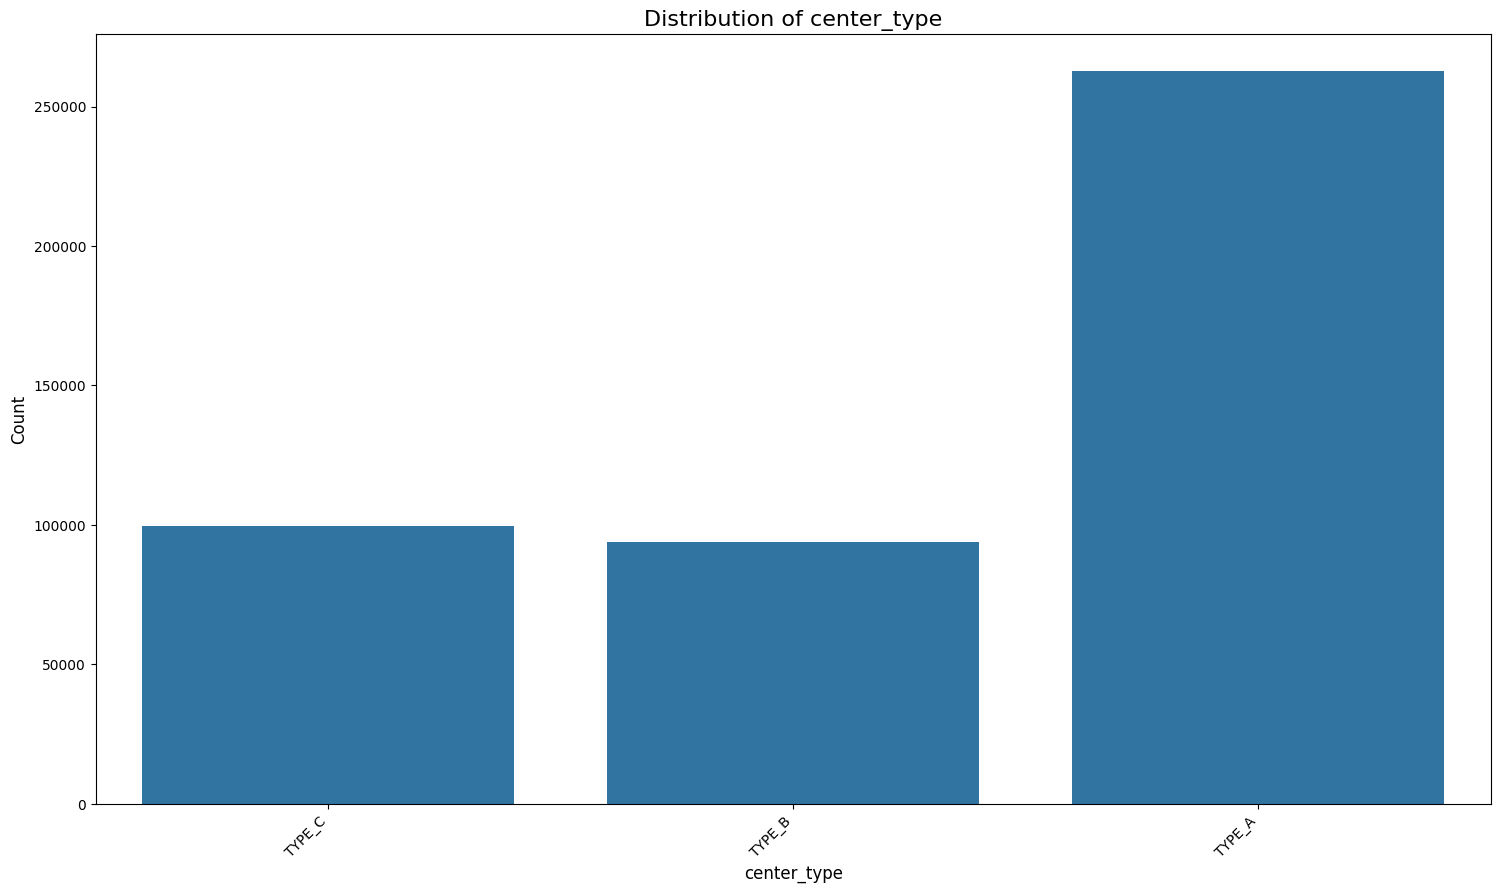

10. `op_area`
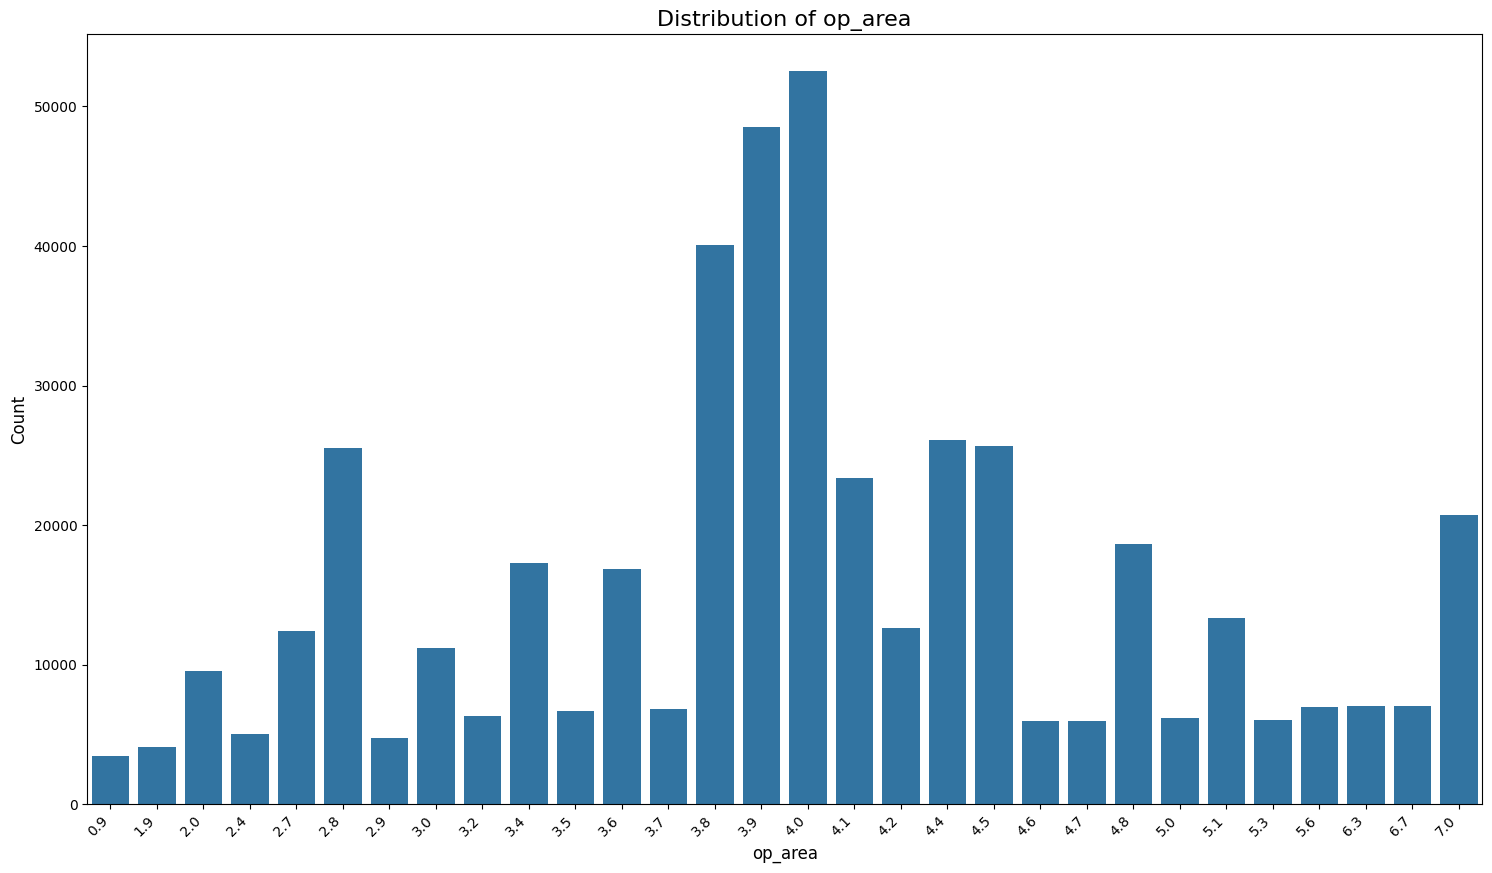


### Correlation matrix 
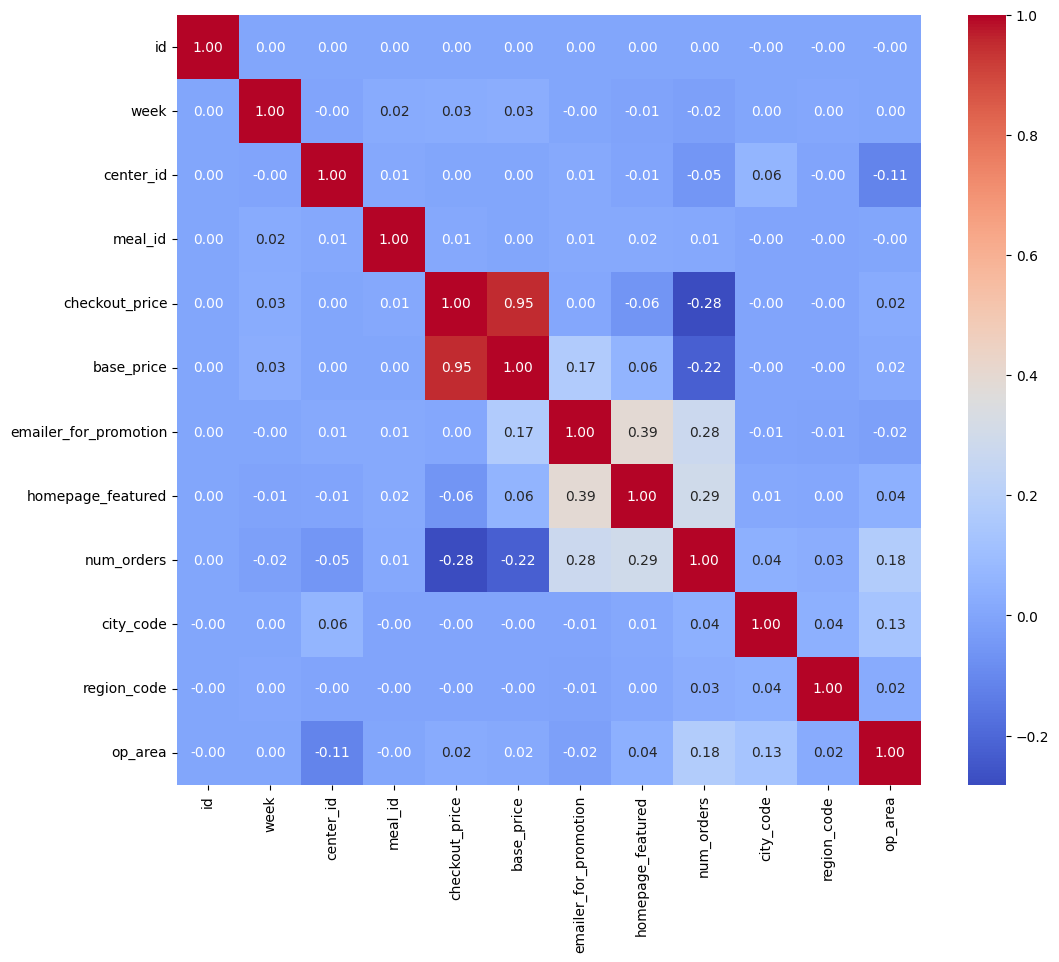

### 7. Key takeways from Data Profiling

1. `id` column has unique values and therefore, is `uniformly distributed`
2. `week` column has `no outliers` and follows more or less a `uniform distribution` 
3. `center_id` feature represents a `category` and is `reasonably balanced` ~ 1.3% data rows per category (total 77 classes)
4. `meal_id` column represents a `category` and is `somewhat imbalanced` (total 51 classes). Some classes represent only ~ 0.7% of the data rows
5. `check_out price` represents a `numerical` feature and has `outliers`. The mean and median check_out price are 332.2 and 296.8 respectively 
6. `base_price` represents a `numerical` feature and has `outliers`. The mean and median base_price are 354.1 and 310.5 respectively 
7. `emailer_for_promotion` column represents a `category` and is `highly imbalanced`. ~ 92% of the data row show a "zero" value class, meaning order placed without any promotional email
8. `homepage_featured` column represents a `category` and is `highly imbalanced`. ~ 90% of the data row show a "zero" value class, meaning order placed without any homepage_featured
9. `num_orders` is the `numerical` column (to be predicted) and contains some `outliers` as well. Some high number orders (> 11000) appear only once in the data
10. `city_code` column represents a `category` and is `imbalanced` (total 51 classes). For example, classes with city_code 590 and 526 represent 12& and 9.5% of the data respectively
11. `Region_code` column represents a `category` and is `imbalanced` (total 8 classes). The class of value 56 represents 42% of the data
12. `center_type` column represents a `category` and is `imbalanced` (total 3 classes). TYPE_A class represents ~ 60% of the data
13. `op_area` column represents a `category` and is `imbalanced` in the given data set (total 30 classes). The class of value 4 represents ~ 12% of the data 
14. `category` column represents a `category` and is `imbalanced` (total 14 classes). The class with value beverages represent ~ 30% of the data
15. `cusine` column represents a `category` and is resonably `balanced` (total 4 classes) 

#### num_orders Correlations with Other Features

1. `num_orders` has some `positive correlation` with `homepage_features`, `emailer_for_promotion` and `op_area`
2. `num_orders` has somewhat strong `negative correlation` with `check_out_price` and `base_price`


In [15]:
final_train_df.to_csv('train_revised.csv', index=False)